In [1]:
import numpy as np
import pandas as pd

In [2]:
# 数据参数
inputfile = 'E:\\NLP\\Python数据分析与挖掘实战\\chapter5\\demo\\data\\consumption_data.xls'
# 聚类的类别
k = 3
# 离散点阈值
threshold = 2
# 聚类最大循环次数
iteration = 500
# 读取数据
data = pd.read_excel(inputfile, index_col = 'Id')
# 数据标准差规范化 -> 处理后的数据均值为 0， 标准差为 1
data_zs = 1.0 * (data -data .mean()) / data.std()

In [3]:
# K-Means聚类
from sklearn.cluster import KMeans
# 分为 3 类， 并发数为 4， 最大迭代 500 次
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration)
# 开始聚类
model.fit(data_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 简单打印结果与详细输出原始数据及其类别参考K-means聚类分析

### 标准化数据及其类别

In [4]:
# 标准化数据及其类别
r = pd.concat([data_zs, pd.Series(model.labels_, index = data.index)], axis = 1)
# 每个样本对应的类别
# 重命名表头
r.columns = list(data.columns) + ['聚类类别']
# 筛选出 聚类类别 == 1 的值
print(r[['R', 'F', 'M']][r['聚类类别'] == 1])

            R         F         M
Id                               
17   5.683780 -1.039580 -0.063372
30   3.223983 -0.357079  5.949751
58   3.671219 -0.766579  2.598311
77   4.565690  0.188922  0.558964
91   3.298522 -0.220578 -0.168765
103  5.087465 -0.766579  0.759841
116  2.404051 -1.176080 -1.377282
119  3.596680 -0.630079  0.449728
130  1.658658  0.188922  0.352931
139  4.714769  0.188922  1.072847
193  4.192994 -1.176080  0.431252
226  2.553129  0.325422  5.693935
237  2.404051 -1.176080 -1.198557
255  3.298522  0.461922  0.444683
256  1.882276 -1.176080 -0.010403
269  3.671219 -0.493579 -1.231526
282  3.149444  0.598423 -0.207884
298  3.894837  0.734923  0.530929
300  3.298522 -0.493579  1.163202
318  4.043915  1.826924  0.092614
333  3.596680  0.188922  0.028408
357  2.254972 -0.630079 -1.247263
379  2.031354  0.188922 -0.243480
400  1.658658 -1.039580  0.642555
419  3.074904 -0.220578  0.280731
526  1.584119 -1.039580  1.238071
559  1.882276 -1.039580  1.010221
612  3.149444 

In [5]:
norm = []
# 逐一处理
for i in range(k):
    # 筛选出 聚类类别 == i 的值 减去 聚类中心值
    norm_tmp = r[['R', 'F', 'M']][r['聚类类别'] == i] - model.cluster_centers_[i]
    # 求出绝对距离
    # linalg=linear（线性）+algebra（代数），norm则表示范数
    # http://blog.csdn.net/lanchunhui/article/details/51004387
    # apply -> https://www.cnblogs.com/paranoia/p/6196865.html
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis = 1)
    # 求相对距离并添加
    # 绝对距离 / 相对距离
    norm.append(norm_tmp / norm_tmp.median())
# 合并
norm = pd.concat(norm)
print(norm)

Id
3      1.015762
10     0.963867
13     1.008692
14     1.336743
16     0.994034
23     0.636732
26     1.187973
28     1.058972
31     1.081499
35     0.426717
36     1.351730
39     2.849060
42     1.308715
45     0.812585
49     1.187293
50     0.984808
54     1.005113
62     0.893358
63     1.096972
65     0.903822
71     1.363035
72     0.960079
75     1.269320
78     1.009831
79     0.660663
86     0.712530
87     0.920576
90     0.273766
93     1.435632
94     0.682310
         ...   
891    1.170057
892    0.667187
896    0.957613
897    0.982399
899    1.202092
901    0.248479
903    1.319329
904    1.189020
906    0.232003
907    0.849913
909    1.114179
911    1.123684
912    0.920755
915    1.206863
918    1.581306
919    0.835296
920    1.030262
921    0.825983
922    0.409997
924    0.875111
925    0.897273
926    1.072712
928    0.870499
933    1.260840
937    1.625227
938    0.499510
939    0.524808
940    1.083012
941    1.072184
942    0.712370
Length: 940, dtype: f

In [6]:
# 导入图像库
import matplotlib.pyplot as plt
# 正常显示中文标签, 设置 FangSong/黑体
plt.rcParams['font.sans-serif'] = [u'SimHei']
# 解决 负号 的显示问题
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# 正常点
norm[norm <= threshold].plot(style = 'go')

In [8]:
# 离群点
discrete_points = norm[norm > threshold]
discrete_points.plot(style = 'ro')

In [9]:
# 离群点做标记
for i in range(len(discrete_points)):
    id = discrete_points.index[i]
    # 基于索引位来选取数据集（含头不含尾）
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %.2f)' %(id, n), xy = (id, n), xytext = (id, n))

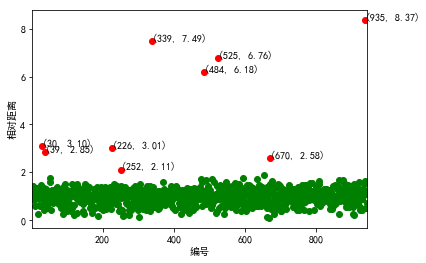

In [10]:
# 作图
plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()